In [456]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random

In [468]:
def LinearRegressor(table, random):
    X = table.iloc[:, :-1]
    y = table.iloc[:, -1]
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = random)
    
    model = LinearRegression()
    model.fit(x_train,y_train)
    r_sq = model.score(x_test, y_test)
    
    y_pred = model.predict(X)
    
# #     print('intercept:', model.intercept_)
   # print('R2_Score:', r_sq)
# #    print('slope:', model.coef_)  
    return model, model.coef_, r_sq

In [293]:
Batsman_Table = pd.read_excel('Squared_Batsman.xlsx')

In [4]:
Bowler_Table = pd.read_excel('2013-2018_Bowler_table.xlsx')

In [5]:
AllRounder_Table = pd.read_excel('2013-2018_AllRounder_table.xlsx')

In [296]:
Batsman_Table.drop(Batsman_Table.columns[:5], axis = 1, inplace = True)

In [297]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(float)

In [298]:
Batsman_Table = clean_dataset(Batsman_Table)

In [299]:
Batsman_Table

,Year+1 Age,Year+1 Matches,Year+1 Innings,Year+1 Not Outs,Year+1 Runs,Year+1 Batting Avg,Year+1 Batting Strike Rate,Year+1 Highest Score,Year+1 Total 4s,Year+1 Total 6s,...,Year Total 6s ** 2,Year Total 50s ** 2,Year Total 100s ** 2,Year Batting Avg Death ** 2,Year Batting Strike Rate Death ** 2,Year Batting Avg PowerPlay ** 2,Year Batting Strike Rate PowerPlay ** 2,Year Batting Avg T20I ** 2,Year Batting Strike Rate T20I ** 2,IPL Pts per Match Year+2
0,29.0,14.0,13.0,0.153846,30.384615,35.90,158.63,89.0,2.000000,1.846154,...,225.0,4.0,0.0,1383.840000,52729.936900,196.0000,54442.8889,289.000000,14745.244900,15.437500
1,30.0,16.0,14.0,0.214286,36.642857,46.63,175.08,133.0,4.285714,1.571429,...,576.0,9.0,0.0,721.459600,42679.428100,289.0000,12843.6889,784.000000,23669.822500,19.968750
2,31.0,16.0,16.0,0.187500,42.937500,52.84,168.79,129.0,3.562500,2.312500,...,484.0,4.0,1.0,17424.000000,48400.000000,441.0000,12544.0000,522.579600,15383.440900,11.222222
3,32.0,9.0,9.0,0.111111,24.000000,27.00,132.51,89.0,1.333333,1.777778,...,1369.0,36.0,1.0,2601.000000,52148.289600,20449.0000,20449.0000,824.264100,30025.958400,18.125000
6,27.0,13.0,13.0,0.153846,23.769231,28.09,117.49,88.0,2.384615,0.692308,...,256.0,16.0,0.0,4.000000,1600.000000,1156.0000,16197.6529,1907.068900,35528.480100,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,35.0,17.0,17.0,0.000000,26.764706,26.76,144.44,122.0,3.294118,1.058824,...,36.0,1.0,0.0,121.000000,33609.888900,1013.1489,13238.8036,583.259654,17064.397870,5.062500
172,29.0,17.0,13.0,0.153846,27.846154,32.90,145.38,115.0,2.538462,1.384615,...,16.0,0.0,0.0,293.783832,16191.054387,812.2500,16045.2889,583.259654,17064.397870,7.857143
173,30.0,14.0,13.0,0.000000,19.153846,19.15,126.39,42.0,1.230769,0.769231,...,324.0,4.0,1.0,900.000000,41840.702500,729.0000,16931.2144,543.245106,11561.523220,8.416667
174,31.0,12.0,12.0,0.083333,22.500000,24.54,127.35,56.0,2.416667,0.083333,...,100.0,0.0,0.0,169.000000,21824.152900,240.2500,17651.7796,665.872220,12127.570688,7.714286


In [470]:
def findMaxRState(table):
    maxim = dict()
    for count in range(0,1000):
        r_score = LinearRegressor(table, count)[2]
        maxim[count] = r_score
    return max(maxim, key=maxim.get)

In [181]:
findMaxRState(Batsman_Table)

68

In [193]:
LinearRegressor(Batsman_Table[Batsman_Table.columns[10:]], 916)

(array([ 1.51856942e+01,  1.18090121e+01,  5.68636572e-01, -1.14208658e+00,
         3.38355840e-01, -7.17668953e-01, -9.40161351e-01, -9.01004406e-01,
         7.43424522e+00, -4.15969407e+00,  3.71872684e+00, -6.99327799e+00,
         8.69459942e+00, -8.69459942e+00,  1.32458562e+01, -1.61806313e+01,
         3.98888781e+00,  3.77192415e-01,  1.11002228e+00, -7.99399323e+00,
         2.03139118e+00, -2.02542675e+00,  1.63044148e+00,  1.96482574e-01,
        -8.24948651e+00,  1.04924170e+01, -1.57584049e+00, -1.23735869e+00,
        -5.49223378e-01, -8.12910963e-01, -5.42190367e-01,  4.41702136e+00,
         7.03041791e-13,  1.09789402e+00,  1.06016208e-01, -2.83851707e-01,
        -7.75786802e-01,  2.82287268e-04, -5.88296235e-03, -6.03496622e-04,
         3.99658333e-04, -1.75192290e-02,  2.32743525e-02, -3.12931038e+00,
        -7.60275659e+00, -2.17056860e-03,  2.18559695e-03, -5.77410645e-03,
         4.84324905e-03,  8.04423657e-03,  3.17164094e-03, -1.35760934e+00,
         7.1

In [380]:
def tryoutColumns(table, num):
    arr = []
    while len(arr) < num:
        gen = random.randint(0, len(table.columns)-2)
        if gen not in arr:
            arr.append(gen)
    
    names = []
    for elm in arr:
        names.append(table.columns[elm])
    return names

In [302]:
Batsman_Table

,Year+1 Age,Year+1 Matches,Year+1 Innings,Year+1 Not Outs,Year+1 Runs,Year+1 Batting Avg,Year+1 Batting Strike Rate,Year+1 Highest Score,Year+1 Total 4s,Year+1 Total 6s,...,Year Total 6s ** 2,Year Total 50s ** 2,Year Total 100s ** 2,Year Batting Avg Death ** 2,Year Batting Strike Rate Death ** 2,Year Batting Avg PowerPlay ** 2,Year Batting Strike Rate PowerPlay ** 2,Year Batting Avg T20I ** 2,Year Batting Strike Rate T20I ** 2,IPL Pts per Match Year+2
0,29.0,14.0,13.0,0.153846,30.384615,35.90,158.63,89.0,2.000000,1.846154,...,225.0,4.0,0.0,1383.840000,52729.936900,196.0000,54442.8889,289.000000,14745.244900,15.437500
1,30.0,16.0,14.0,0.214286,36.642857,46.63,175.08,133.0,4.285714,1.571429,...,576.0,9.0,0.0,721.459600,42679.428100,289.0000,12843.6889,784.000000,23669.822500,19.968750
2,31.0,16.0,16.0,0.187500,42.937500,52.84,168.79,129.0,3.562500,2.312500,...,484.0,4.0,1.0,17424.000000,48400.000000,441.0000,12544.0000,522.579600,15383.440900,11.222222
3,32.0,9.0,9.0,0.111111,24.000000,27.00,132.51,89.0,1.333333,1.777778,...,1369.0,36.0,1.0,2601.000000,52148.289600,20449.0000,20449.0000,824.264100,30025.958400,18.125000
6,27.0,13.0,13.0,0.153846,23.769231,28.09,117.49,88.0,2.384615,0.692308,...,256.0,16.0,0.0,4.000000,1600.000000,1156.0000,16197.6529,1907.068900,35528.480100,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,35.0,17.0,17.0,0.000000,26.764706,26.76,144.44,122.0,3.294118,1.058824,...,36.0,1.0,0.0,121.000000,33609.888900,1013.1489,13238.8036,583.259654,17064.397870,5.062500
172,29.0,17.0,13.0,0.153846,27.846154,32.90,145.38,115.0,2.538462,1.384615,...,16.0,0.0,0.0,293.783832,16191.054387,812.2500,16045.2889,583.259654,17064.397870,7.857143
173,30.0,14.0,13.0,0.000000,19.153846,19.15,126.39,42.0,1.230769,0.769231,...,324.0,4.0,1.0,900.000000,41840.702500,729.0000,16931.2144,543.245106,11561.523220,8.416667
174,31.0,12.0,12.0,0.083333,22.500000,24.54,127.35,56.0,2.416667,0.083333,...,100.0,0.0,0.0,169.000000,21824.152900,240.2500,17651.7796,665.872220,12127.570688,7.714286


In [303]:
cols = tryoutColumns(Batsman_Table, 50)

In [304]:
bats = Batsman_Table[cols]

In [188]:
regress = LinearRegressor(Batsman_Table, 443)

In [194]:
LinearRegressor(bats, 443)

(array([ 4.01194056e-01,  5.17209521e-04, -3.49350552e-03, -1.10555203e-03,
         2.41540625e-03,  1.37062194e-02,  4.92235852e-03, -8.43991263e-05,
        -1.86726616e-01,  1.07337341e-05, -2.75980132e-02,  8.08971145e-04,
        -1.46376302e-02,  1.25192459e-04, -5.76613245e-01, -4.45768073e-02,
         9.60017808e-04,  4.94093322e-02, -3.13580379e-02, -3.23935183e-07,
         1.54098940e-01, -1.39749868e-02, -3.08359509e-04, -1.53520565e-02,
         9.03539000e-05,  8.19091457e-06,  1.10876564e-05,  8.28478001e-02,
        -1.71016584e-03,  8.21499290e-06,  1.08596810e-04,  1.91583439e-04,
         1.48682519e-04,  1.83822804e-05, -6.55601238e-01, -1.98006379e-02,
        -8.80694874e-03,  1.89399353e-01,  1.30312316e-06,  4.10746496e-04,
         4.05001551e-01, -1.15871190e-02, -9.35710537e-03,  3.14325361e-02,
         4.28376474e-02,  6.51723260e-05,  1.94297503e-05, -6.06162561e-01,
        -3.79085125e-04]),
 -2.5756030220825354)

In [381]:
def returnMaxR2Score(table, num):
    cols = tryoutColumns(table, num)
    cols.append('IPL Pts per Match Year+2')
    bats = table[cols]
    r2_score = LinearRegressor(bats, findMaxRState(bats))[1]
    return bats, cols, r2_score
    

In [306]:
returnMaxR2Score(Batsman_Table, 30)[2]

0.2839454555714279

In [310]:
Batsman_Table

,Year+1 Age,Year+1 Matches,Year+1 Innings,Year+1 Not Outs,Year+1 Runs,Year+1 Batting Avg,Year+1 Batting Strike Rate,Year+1 Highest Score,Year+1 Total 4s,Year+1 Total 6s,...,Year Total 6s ** 2,Year Total 50s ** 2,Year Total 100s ** 2,Year Batting Avg Death ** 2,Year Batting Strike Rate Death ** 2,Year Batting Avg PowerPlay ** 2,Year Batting Strike Rate PowerPlay ** 2,Year Batting Avg T20I ** 2,Year Batting Strike Rate T20I ** 2,IPL Pts per Match Year+2
0,29.0,14.0,13.0,0.153846,30.384615,35.90,158.63,89.0,2.000000,1.846154,...,225.0,4.0,0.0,1383.840000,52729.936900,196.0000,54442.8889,289.000000,14745.244900,15.437500
1,30.0,16.0,14.0,0.214286,36.642857,46.63,175.08,133.0,4.285714,1.571429,...,576.0,9.0,0.0,721.459600,42679.428100,289.0000,12843.6889,784.000000,23669.822500,19.968750
2,31.0,16.0,16.0,0.187500,42.937500,52.84,168.79,129.0,3.562500,2.312500,...,484.0,4.0,1.0,17424.000000,48400.000000,441.0000,12544.0000,522.579600,15383.440900,11.222222
3,32.0,9.0,9.0,0.111111,24.000000,27.00,132.51,89.0,1.333333,1.777778,...,1369.0,36.0,1.0,2601.000000,52148.289600,20449.0000,20449.0000,824.264100,30025.958400,18.125000
6,27.0,13.0,13.0,0.153846,23.769231,28.09,117.49,88.0,2.384615,0.692308,...,256.0,16.0,0.0,4.000000,1600.000000,1156.0000,16197.6529,1907.068900,35528.480100,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,35.0,17.0,17.0,0.000000,26.764706,26.76,144.44,122.0,3.294118,1.058824,...,36.0,1.0,0.0,121.000000,33609.888900,1013.1489,13238.8036,583.259654,17064.397870,5.062500
172,29.0,17.0,13.0,0.153846,27.846154,32.90,145.38,115.0,2.538462,1.384615,...,16.0,0.0,0.0,293.783832,16191.054387,812.2500,16045.2889,583.259654,17064.397870,7.857143
173,30.0,14.0,13.0,0.000000,19.153846,19.15,126.39,42.0,1.230769,0.769231,...,324.0,4.0,1.0,900.000000,41840.702500,729.0000,16931.2144,543.245106,11561.523220,8.416667
174,31.0,12.0,12.0,0.083333,22.500000,24.54,127.35,56.0,2.416667,0.083333,...,100.0,0.0,0.0,169.000000,21824.152900,240.2500,17651.7796,665.872220,12127.570688,7.714286


In [311]:
bat_standardized = StandardizeTable(Batsman_Table)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [312]:
bat_standardized.drop([0], axis = 1, inplace = True)

In [313]:
dictionary = dict()
bat_standardized = clean_dataset(bat_standardized)
for i in range(10, len(bat_standardized.columns)):
    max_r2 = returnMaxR2Score(bat_standardized, i)[2]
    dictionary[i] = max_r2
    
print(max(dictionary, key=dictionary.get))

27


In [308]:
dictionary[29]

0.31172559251568976

In [288]:
df = pd.DataFrame.from_dict(dictionary, orient='index')

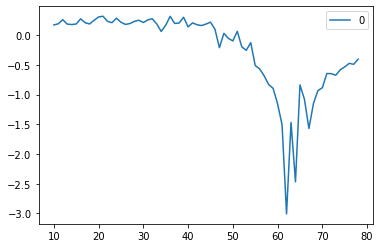

In [289]:
df.plot()

In [239]:
def StandardizeTable(table):
    for col in table.columns:
        mean = np.mean(table[col])
        std = np.std(table[col])
        for index in table.index:
            table[col][index] = float((table[col][index] - mean) / std)
        
    return table

In [249]:
bat_standardized = StandardizeTable(Batsman_Table)

In [251]:
Batsman_Table

,Year+1 Age,Year+1 Matches,Year+1 Innings,Year+1 Not Outs,Year+1 Runs,Year+1 Batting Avg,Year+1 Batting Strike Rate,Year+1 Highest Score,Year+1 Total 4s,Year+1 Total 6s,...,Year Total 6s ** 2,Year Total 50s ** 2,Year Total 100s ** 2,Year Batting Avg Death ** 2,Year Batting Strike Rate Death ** 2,Year Batting Avg PowerPlay ** 2,Year Batting Strike Rate PowerPlay ** 2,Year Batting Avg T20I ** 2,Year Batting Strike Rate T20I ** 2,IPL Pts per Match Year+2


In [244]:
returnMaxR2Score(bat_standardized, 40)[2]

0.2858121677191734

In [163]:
drop_columns = []
for i in range(len(Batsman_Table.columns)-1):
    if abs(regress[0][i]) < 0.01:
        print(Batsman_Table.columns[i], " : ", regress[0][i])
        drop_columns.append(Batsman_Table.columns[i])

0  :  4.440892098500626e-16
Year+1 Runs ** 2  :  -0.00014921268158163414
Year+1 Batting Avg ** 2  :  0.007505117922329829
Year+1 Batting Strike Rate ** 2  :  0.008097025190981766
Year+1 Highest Score ** 2  :  -0.000866738778386722
Year+1 Batting Avg Death ** 2  :  0.0014101030977053952
Year+1 Batting Strike Rate Death ** 2  :  -0.0006850828439093348
Year+1 Batting Avg PowerPlay ** 2  :  -0.005293295798217745
Year+1 Batting Strike Rate PowerPlay ** 2  :  0.0010503154568793915
Year+1 Batting Strike Rate T20I ** 2  :  -0.0004852310458393072
Year Runs ** 2  :  0.00013451669068165195
Year Batting Avg ** 2  :  0.00027890351884175824
Year Batting Strike Rate ** 2  :  0.0033920323458532797
Year Highest Score ** 2  :  -0.004413922181384866
Year Total 4s ** 2  :  -0.00242126079284663
Year Batting Avg Death ** 2  :  0.005263812197191575
Year Batting Strike Rate Death ** 2  :  -0.0015511331457352395
Year Batting Avg PowerPlay ** 2  :  -0.0015485605216619125
Year Batting Strike Rate PowerPlay ** 2 

In [88]:
Batsman_Table.drop(drop_columns[:-1], axis = 1, inplace = True)

In [92]:
negative_arr = []

In [291]:
Batsman_Table.columns

Index(['Year+1 Age', 'Year+1 Matches', 'Year+1 Innings', 'Year+1 Not Outs',
       'Year+1 Runs', 'Year+1 Batting Avg', 'Year+1 Batting Strike Rate',
       'Year+1 Highest Score', 'Year+1 Total 4s', 'Year+1 Total 6s',
       'Year+1 Total 50s', 'Year+1 Total 100s', 'Year+1 Batting Avg Death',
       'Year+1 Batting Strike Rate Death', 'Year+1 Batting Avg PowerPlay',
       'Year+1 Batting Strike Rate PowerPlay', 'Year+1 Batting Avg T20I',
       'Year+1 Batting Strike Rate T20I', 'Year+1 Middle-order Batsman',
       'Year+1 Opening Batsman', 'Year+1 Top-order Batsman',
       'Year+1 Wicket-Keeper', 'Year+1 Domestic', 'Year+1 Intl.', 'Year Age',
       'Year Matches', 'Year Innings', 'Year Not Outs', 'Year Runs',
       'Year Batting Avg', 'Year Batting Strike Rate', 'Year Highest Score',
       'Year Total 4s', 'Year Total 6s', 'Year Total 50s', 'Year Total 100s',
       'Year Batting Avg Death', 'Year Batting Strike Rate Death',
       'Year Batting Avg PowerPlay', 'Year Batting St

In [421]:
def OutputR2Score(table):
    table.drop(table.columns[:5], axis = 1, inplace = True)
    table = clean_dataset(table)
    if len(table) == 0:
        print("TABLE HAS NO ROWS! ERROR")
    random_state = findMaxRState(table)
    LinearRegressor(table, random_state)
   
    dictionary = dict()
    for i in range(10, len(table.columns)):
        max_r2 = returnMaxR2Score(table, i)[2]
        dictionary[i] = max_r2

        
        
    return dictionary[max(dictionary, key=dictionary.get)], returnMaxR2Score(table, max(dictionary, key=dictionary.get))[1], max(dictionary, key=dictionary.get)

In [325]:
batsman_per_innings = pd.read_excel('Squared_Batsman.xlsx')

In [333]:
def SquaredTable(table):
    for col in table.columns:
        if type(table[col].iloc[0]) != str:
            table[str(col) + ' ** 2'] = table[col] * table[col]
    return table

In [334]:
New_Batsman = pd.read_excel('Gaurav_Changed.xlsx')

In [336]:
SquaredTable(New_Batsman).to_excel('Gaurav_Change_Squared.xlsx')

In [441]:
New_Batsman = pd.read_excel('Gaurav_Change_Squared.xlsx')

In [442]:
OutputR2Score(New_Batsman)

(0.34728274835462924,
 ['Year Not Outs ** 2',
  'Year+1 Highest Score ** 2',
  'Year Boundaries',
  'Year Highest Score',
  'Year Innings',
  'Catches per Innings ** 2',
  'Year Boundaries ** 2',
  'Year Batting Avg Cumulative',
  'Catches',
  'Year Total 100s/Innings ** 2',
  'Year Total 50s/Innings',
  'Year+1 Opening Batsman',
  'Year+1 Innings',
  'Catches per Innings',
  'Year+1 Total 50s/Innings',
  'Year Not Outs',
  'Year Age ** 2',
  'IPL Pts per Match Year+2'],
 17)

In [443]:
Batsman_With_Catches = pd.read_excel('Squared_Batsman.xlsx')

In [444]:
OutputR2Score(Batsman_With_Catches)

(0.448682746532026,
 ['Year+1 Batting Strike Rate PowerPlay',
  'Year+1 Total 50s/Innings',
  'Year+1 Runs/Innings',
  'Year Total 4s ** 2',
  'Year+1 Not Outs ** 2',
  'Year+1 Batting Avg',
  'Year Not Outs/Innings',
  'Year+1 Total 100s ** 2',
  'Year Total 6s/Innings',
  'Year Total 4s/Innings',
  'Year Batting Strike Rate Death',
  'Year Batting Strike Rate PowerPlay ** 2',
  'Year Total 50s ** 2',
  'Year Matches ** 2',
  'Year Highest Score',
  'Year+1 Innings',
  'Year+1 Intl.',
  'IPL Pts per Match Year+2'],
 17)

In [384]:
Best20Features = pd.read_excel('20BestFeatures.xlsx')

In [385]:
OutputR2Score(Best20Features)

(0.2485871901695642, 17)

In [431]:
Best30Features = pd.read_excel('30BestFeatures.xlsx')

In [432]:
OutputR2Score(Best30Features)

(0.4162458343891219,
 ['Year Batting Avg T20I',
  'Year+1 Total 50s ** 2',
  'Year Total 50s ** 2',
  'Year+1 Intl.',
  'Year Total 4s',
  'Year Total 50s',
  'Year Total 6s',
  'Year Not Outs ** 2',
  'Year+1 Batting Avg',
  'Year Not Outs',
  'Year Batting Avg',
  'Google Trends Mean',
  'Year+1 Age',
  'IPL Pts per Match Year+2'],
 13)

In [439]:
Best40Features = pd.read_excel('40BestFeatures.xlsx')

In [440]:
OutputR2Score(Best40Features)

(0.36691499212487255,
 ['Year+1 Matches ** 2',
  'Year Batting Strike Rate',
  'Year+1 Not Outs',
  'Year+1 Innings',
  'Year Batting Avg Death',
  'Year Total 4s',
  'Year+1 Batting Strike Rate T20I',
  'Year+1 Total 50s ** 2',
  'Year+1 Batting Avg T20I',
  'Year+1 Batting Avg Death',
  'Year Age ** 2',
  'Year+1 Age',
  'Year Not Outs',
  'Year+1 Innings ** 2',
  'Year Batting Avg',
  'Year+1 Batting Avg',
  'Year+1 Intl.',
  'Year+1 Total 100s ** 2',
  'Year Age',
  'Year Batting Avg PowerPlay',
  'Year+1 Matches',
  'Google Trends Mean',
  'Year Total 6s',
  'Year Matches',
  'Year+1 Not Outs ** 2',
  'Year Total 50s',
  'Year Total 50s ** 2',
  'IPL Pts per Match Year+2'],
 27)

In [426]:
Best50Features = pd.read_excel('50BestFeatures.xlsx')

In [427]:
OutputR2Score(Best50Features)

(0.3705698071948975,
 ['Year Batting Strike Rate Death',
  'Year Total 50s',
  'Year Total 100s ** 2',
  'Year Innings',
  'Year Not Outs ** 2',
  'Year Innings ** 2',
  'Year Matches',
  'Year Runs',
  'Year Batting Avg Death',
  'Year+1 Batting Avg PowerPlay',
  'Year+1 Innings',
  'Year+1 Runs',
  'Year Batting Avg',
  'Year+1 Total 100s ** 2',
  'Year+1 Batting Avg',
  'Year+1 Innings ** 2',
  'Year Total 4s',
  'Year+1 Highest Score',
  'IPL Pts per Match Year+2'],
 18)

In [429]:
Best45Features = pd.read_excel('45BestFeatures.xlsx')

In [430]:
OutputR2Score(Best45Features)

(0.3638004118835753,
 ['Google Trends Mean',
  'Year Total 4s',
  'Year+1 Batting Strike Rate',
  'Year+1 Batting Strike Rate PowerPlay',
  'Year+1 Innings',
  'Year Total 100s ** 2',
  'Year Total 50s',
  'Year Batting Strike Rate',
  'Year Batting Avg',
  'Year Matches',
  'Year+1 Total 100s ** 2',
  'Year Batting Avg T20I',
  'Year+1 Batting Avg T20I',
  'Year+1 Not Outs ** 2',
  'Year+1 Not Outs',
  'Year Batting Strike Rate T20I',
  'Year Not Outs ** 2',
  'Year Total 6s',
  'Year+1 Age',
  'Year Batting Strike Rate PowerPlay',
  'Year Highest Score',
  'Year Matches ** 2',
  'Year+1 Age ** 2',
  'Year+1 Total 50s ** 2',
  'IPL Pts per Match Year+2'],
 24)

In [428]:
Best42Features = pd.read_excel('42BestFeatures.xlsx')
OutputR2Score(Best42Features)

(0.39593560375234027,
 ['Year Highest Score',
  'Year Not Outs',
  'Year+1 Matches ** 2',
  'Year+1 Batting Avg',
  'Year+1 Total 4s',
  'Year+1 Batting Avg Death',
  'Year Total 4s',
  'Google Trends Mean',
  'Year+1 Batting Strike Rate Death',
  'Year Batting Strike Rate',
  'Year Not Outs ** 2',
  'Year+1 Highest Score',
  'Year+1 Total 6s',
  'IPL Pts per Match Year+2'],
 13)

In [474]:
LogicFeatures = pd.read_excel('Finale.xlsx')
random2 = findMaxRState(LogicFeatures)
LinearRegressor(LogicFeatures, random2)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 array([-1.10033713e+00,  2.93264903e-02,  3.10111914e-01, -1.49996310e-03,
        -1.15380953e-01,  8.26224302e-02,  9.17160439e-02,  6.54211759e-02,
         4.21299105e-02,  2.43358129e-02,  9.16582894e-02,  9.17853963e-02,
        -1.05543085e-01,  7.31878622e-03, -7.60837437e-01, -9.42486143e-01,
        -1.07714406e-02,  4.96666354e-03, -6.17490173e-04,  1.91516427e-02]),
 0.37473185250239516)

In [466]:
LogicFeatures = pd.read_excel('Output1.xlsx')


OutputR2Score(LogicFeatures)

(0.4093441142959957,
 ['Year+1 Batting Avg',
  'Year Total 6s',
  'Year+1 Total 4s',
  'Year+1 Not Outs',
  'Year+1 Total 100s ** 2',
  'Year Not Outs ** 2',
  'Year+1 Total 6s',
  'Year Total 4s',
  'Year+1 Batting Avg T20I',
  'Year Batting Avg',
  'Year Highest Score',
  'Year Matches ** 2',
  'Year+1 Not Outs ** 2',
  'IPL Pts per Match Year+2'],
 13)

In [478]:
from sklearn.model_selection import KFold, cross_val_score

In [495]:
from sklearn.model_selection import KFold, cross_val_score
def crossValidation(model, X, y, split_num):
    k_fold = KFold(n_splits=split_num)
    for train_indices, test_indices in k_fold.split(X):
        print('Train: %s | test: %s' % (train_indices, test_indices))
    return cross_val_score(model, X, y, cv=k_fold, n_jobs = -1)

In [480]:
mod = LinearRegressor(LogicFeatures, random2)[0]

In [481]:
X,y = LogicFeatures.iloc[:,:-1], LogicFeatures.iloc[:, -1]

In [491]:
crossvalmean= dict()
for i in range(3,15):
    crossvalmean[i] = crossValidation(mod, X,y,i).std()

In [496]:
crossValidation(mod, X,y,12)

Train: [ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122] | test: [ 0  1  2  3  4  5  6  7  8  9 10]
Train: [  0   1   2   3   4   5   6   7   8   9  10  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122] | test: [11 12 13 14 15 16 17 1

array([-0.0327021 ,  0.29232538,  0.5092286 , -0.37689899, -0.40123029,
       -1.50812712, -2.62545641, -1.29979903, -0.60915072, -0.135998  ,
        0.14861284, -8.72376094])

In [520]:
def pretty_print_coefs(intercept, coefs, columns):
    lst = zip(coefs, columns)
    return str(intercept) + ' ' + " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [510]:
train = pd.Series(np.arange(0,22)).append(pd.Series(np.arange(33,123)))
test = pd.Series(np.arange(22,33))
test

0     22
1     23
2     24
3     25
4     26
5     27
6     28
7     29
8     30
9     31
10    32
dtype: int64

In [508]:
mod.fit(X.iloc[train], y.iloc[train])
mod.score(X.iloc[test], y.iloc[test])

0.5092286040687379

In [521]:
pretty_print_coefs(mod.intercept_, mod.coef_, X.columns)

'2.2058130556782505 -0.616 * Year+1 Intl. + 0.05 * Year+1 Batting Avg Death + -0.118 * Year Not Outs + -0.001 * Year+1 Age ** 2 + -0.126 * Year Total 4s + 0.055 * Year+1 Total 4s + 0.04 * Year Total 6s + 0.095 * Year+1 Total 6s + 0.032 * Year Batting Avg T20I + 0.018 * Year+1 Batting Avg T20I + 0.175 * Year Batting Avg + 0.051 * Year+1 Batting Avg + -0.096 * Year Not Outs ** 2 + 0.004 * Year Batting Strike Rate PowerPlay + -0.635 * Year+1 Total 100s ** 2 + -0.441 * Year+1 Not Outs + -0.055 * Year+1 Not Outs ** 2 + 0.013 * Year Matches ** 2 + -0.004 * Year+1 Matches ** 2 + -0.001 * Year Highest Score'

In [650]:
y_pred = mod.predict(X)

In [651]:
InputOutputBatsman = pd.DataFrame(columns = ['Player Name','Season Year+2','IPL Pts per Match Year+2', 'Predicted Points', 'Actual Salary Year+2'])

In [652]:
InputOutputBatsman['IPL Pts per Match Year+2'] = y
InputOutputBatsman['Predicted Points'] = y_pred


In [663]:
InputOutputBatsman.to_excel('InputOutputBatsman.xlsx')

In [653]:
InputOutputBatsman

,Player Name,Season Year+2,IPL Pts per Match Year+2,Predicted Points,Actual Salary Year+2
0,NaN,NaN,15.437500,11.000187,NaN
1,NaN,NaN,19.968750,19.260125,NaN
2,NaN,NaN,11.222222,14.357737,NaN
3,NaN,NaN,18.125000,14.534739,NaN
4,NaN,NaN,3.333333,8.796313,NaN
...,...,...,...,...,...
118,NaN,NaN,5.062500,9.602786,NaN
119,NaN,NaN,7.857143,10.476751,NaN
120,NaN,NaN,8.416667,11.239765,NaN
121,NaN,NaN,7.714286,10.185786,NaN


In [654]:
Batsman_Table2 = pd.read_excel('Squared_Batsman.xlsx')

In [655]:
Batsman_Table2.set_index(np.arange(len(Batsman_Table2)), inplace = True)

In [656]:
for i in range(len(InputOutputBatsman)):
    for count in range(len(Batsman_Table2)):
        if InputOutputBatsman['IPL Pts per Match Year+2'][i] == Batsman_Table2['IPL Pts per Match Year+2'][count]:
            InputOutputBatsman['Player Name'][i] = Batsman_Table2['Player Name'][count]
            InputOutputBatsman['Season Year+2'][i] = Batsman_Table2['Year+1 Season'][count]+1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [657]:
InputOutputBatsman['Player Name'] = Batsman_Table2['Player Name']

In [658]:
def ActualSalary(Season, player):
    master = pd.read_excel(str(Season)+'FinalMasterSheet.xlsx', header=1)
    for count in range(len(master)):
        if master['Player Name'][count] == str(player):
            return master['Salary(Rupees Crore)'][count]

In [661]:
for count in range(len(InputOutputBatsman)):
    if InputOutputBatsman['Season Year+2'][count] != 2020:
        InputOutputBatsman['Actual Salary Year+2'][count] = ActualSalary(InputOutputBatsman['Season Year+2'][count],InputOutputBatsman['Player Name'][count] )
    else:
        InputOutputBatsman['Actual Salary Year+2'][count] = 'None'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
